<span style="color:#6495ED; font-size:2.5em">Problem Statmenet</span>

<strong>Given:</strong> The given dataset contains attributes ( information ) about customers of a bank, including customer demographics and realationship of the bank with their customers, which are essentially the financial products used by these customers.

<strong>To Do:</strong> In this notebook, we will <em>explore various supervised learning classification algorithms to identify the best model that can predict if a customer will avail personal loans</em>.

<span style="color:#6495ED; font-size:2em">Importing Essential Libraries for This Exercise</span>

In [479]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<span style="color:#6495ED; font-size:2em">Importing the data the given CSV file</span>

In [480]:
cdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv") #uploading the contents of the csv file to cdata

<span style="color:#6495ED; font-size:2em">Exploratory Data Analysis</span>

In [481]:
cdata.shape #checking the shape ( number of rows and columns of the dataset)

(5000, 14)

<strong>Observation:</strong> The data contain 5000 rows ( observtions ) with 14 columns. One of these columns will be the target variable, while the others are the feature set.

In [482]:
cdata.head() 

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<strong>Observation:</strong> 
<ul>
    <li>The target variable is the column with the title "Personal Loan"</li>
    <li>The ID column does not add any value</li>
</ul>


<span style="color:#6495ED; font-size:2em">Target Variable ( Personal Loan ) Distribution Analysis</span>
<br>
<span style="color:#6495ED; font-size:1em">Answer to the Question: Get the target column distribution. Your comments</span>

In [483]:
cdata["Personal Loan"].value_counts() # checking the values of the target variable 

0    4520
1     480
Name: Personal Loan, dtype: int64

<strong>Observation:</strong> 
<ul>
    <li>The number of customers who availed personal loans seem far less than number of people who did not avail the loan</li>
    <li> We need to build a model with high percision, accuracy and recall for the value "1" for personal loans i.e. people who get the loans</li>
</ul>

In [484]:
cdata.describe().transpose() # Checking critical information about the dataset - mean, 5 point summary etc 

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<strong>Observation:</strong> 
<ul>
    <li>The count is 5000 for all columns</li>
    <li>The mean or other details for ZIP Code does not make sense</li>

<span style="color:#6495ED; font-size:2em">Feature Corelation Analysis</span>

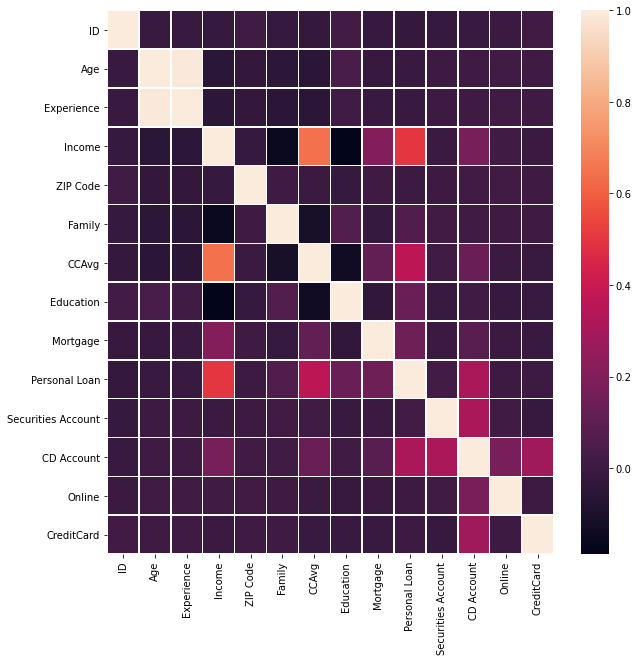

In [485]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cdata.corr(), linewidths=.5, ax=ax)

<strong>Observations:</strong>
<ui>
    <li> There seems to be minimal corelation between CCAvg and Income -Since the co-relation is not significant, I am retaining both featrues</li>
     <li> There seems to be Strong corelation between Experience and Age - one of them is a candidate to be removed </li>
    <li> The other features have minimum corelation - therefore can be retained </li>

<span style="color:#6495ED; font-size:2em">Feature Distribution Analysis</span>
<br>
<span style="color:#6495ED; font-size:1em">Answer to the question: Study the data distribution in each attribute, share your findings</span>

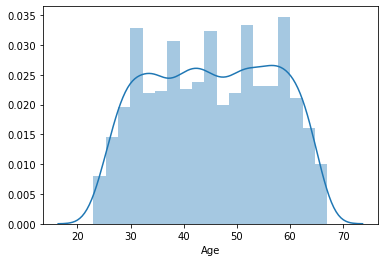

In [486]:
sns.distplot(cdata.Age) # Distribution plot for Age

<strong>Observations:</strong>
<ui>
    <li> Although not perfectly normally distributed the has good representation in all the bins</li>
    <li> Since its age, there does not seem to be any outliers </li>

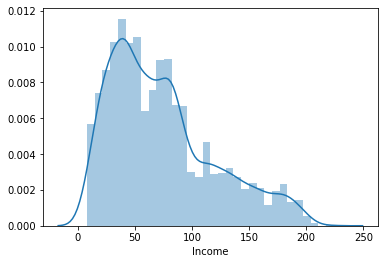

In [487]:
sns.distplot(cdata.Income) # Distribution plot for Income

<strong>Observations:</strong>
<ui>
    <li> There is definite skewness to the left in the data for income</li>
    <li> Most people in the data seem to be earning less than 100k of income</li>
    <li> There are a few people earning more than 200k, but none more than 250k</li>

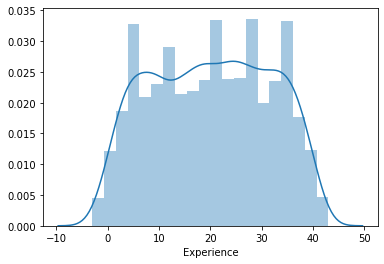

In [488]:
sns.distplot(cdata.Experience) # Distribution plot for Experience 

<strong>Observations:</strong>
<ui>
    <li>The distribution not perfectly normal, but have high concentrations near the media and the mean</li>
    <li> There are a few individuals who have negative experience. This does not make sense. These negative values have to be removed </li>
    <li> Remarkably similar to the Age dist plot </li>
    

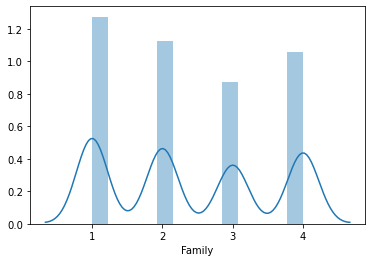

In [489]:
sns.distplot(cdata.Family) # Distribution plot for Family ( number of members )

<strong>Observations:</strong>
<ui>
    <li>Most individuals in this dataset are living alone</li>
    <li>More than 50% of the data have less than 2 members in their family</li>

In [490]:
cdata["ZIP Code"].value_counts().head() # Distribution analysis for ZIP Code

94720    169
94305    127
95616    116
90095     71
93106     57
Name: ZIP Code, dtype: int64

In [491]:
cdata["ZIP Code"].nunique()

467

<strong>Observations:</strong>
<ui>
    <li>This is not a continuous variable</li>
    <li>94720 is the most popular pincode</li>
    <li>There are a total of 467 different ZIP Codes. There is a significant number compared to the total data set size. Hence this cannot be ignored.</li>
        <li>This feature has to be one hot encoded</li>

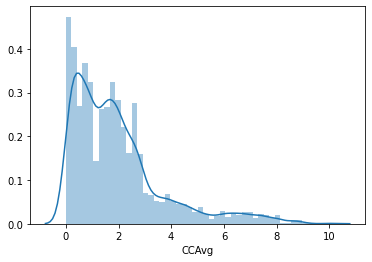

In [492]:
sns.distplot(cdata.CCAvg) # Distribution plot for CCAvg ( spending ) 

<strong>Observations:</strong>
<ui>
    <li> There is a definite left skewness</li>
    <li> There is a peak on 0 ( the starting point - most people are not spending on their credit cards)</li>

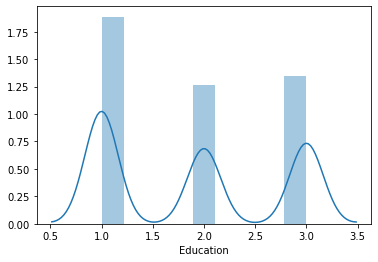

In [493]:
sns.distplot(cdata.Education) # Uni-variate and Bi-variat Analysis of the data 

<strong>Observations:</strong>
<ui>
    <li>Most people are Undergraduates</li>

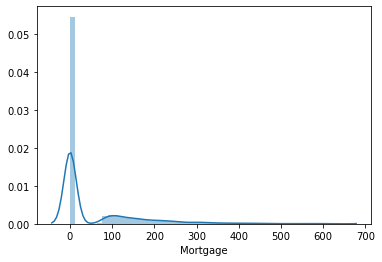

In [494]:
sns.distplot(cdata.Mortgage) # Uni-variate and Bi-variat Analysis of the data 

<strong>Observations:</strong>
<ui>
    <li>The graph is visually not suggesting anything more than the fact that a majority percentage of people dont have any mortgages on their house</li>

In [495]:
cdata["Securities Account"].value_counts() # checking the values of the target variable 

0    4478
1     522
Name: Securities Account, dtype: int64

<strong>Observations:</strong>
<ui>
    <li>The data suggests that the number of people who dont own Securities Account is much higher than the number of people who do</li>

In [496]:
cdata["CD Account"].value_counts() # checking the values of the target variable 

0    4698
1     302
Name: CD Account, dtype: int64

<strong>Observations:</strong>
<ui>
    <li>The data suggests that the number of people who dont own CD Account is much higher than the number of people who do</li>

In [497]:
cdata["Online"].value_counts() # checking the values of the target variable 

1    2984
0    2016
Name: Online, dtype: int64

<strong>Observations:</strong>
<ui>
    <li>The number of people who own an online account and dont own an online account are close to equal</li>

In [498]:
cdata["CreditCard"].value_counts() # checking the values of the target variable 

0    3530
1    1470
Name: CreditCard, dtype: int64

<span style="color:#6495ED; font-size:2em">Checking the Data types of the Columns</span>

In [499]:
cdata.dtypes # Getting the data types of all the columns

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

<strong>Observation:</strong> 
<ul>
    <li>All the columns have the data type as int64 except CCAvg</li>

<span style="color:#6495ED; font-size:2em">Checking for "null" values </span>

In [500]:
cdata.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

<strong>Observation:</strong> 
<ul>
    <li>There are no missing values</li>

In [501]:
cdata.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<span style="color:#6495ED; font-size:2em">EDA Analysis</span> 

<strong>Observation:</strong> 
<ul>
    <li>ID - Not adding value to the model, can be dropeed</li>
    <li>Income, Family, and Modgage - Normally distributed. Does not seem to have corelation with any other features</li>
    <li>Since Age and Experience have a strong co-relation - one of them can be dropped</li>
    <li>CCAvg and Income seem to have a co-relation. But retaining since the corelation is not too high</li>
    <li>Personal Loan - This is the target variable. The values are binary - 0s and 1s</li>
    <li>ZIP Code - Is assumed to a continuous variable in the data, but is actually a categorical variable. Needs to hot encoded to be used in the classification models</li>
    <li>Education - The values of the column should be updated as given in the question sheet. This field also has to be One Hot Encoded to be used in the models</li>
    <li>Securities Account, CD Account, Online, CreditCard - are binary fields that can be used as it in the models</li>

<span style="color:#6495ED; font-size:2em">Data Pre-Processing Based on EDA</span>

<span style="color:#6495ED; font-size:1.5em">Updating the Correct Values for Education Column</span>

In [502]:
cdata['Education'] = cdata['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'}) # Updating values 

<span style="color:#6495ED; font-size:1.5em">Cleaning Data - Attributes that have data issues </span>

<strong>Suspect Attributes:</strong> 
<ul>
    <li>ID - will not influence the decision of the customer</li>
    <li>ZIP Code - Its assumed to be a continuous variable, need to handle it as a categorical variable</li>
    <li>Education - Needs to be One Hot Encoded for optimal model performance</li>

In [503]:
cdata = cdata.drop('ID', axis=1) # Dropping the ID Column

In [504]:
cdata["ZIP Code"].nunique() # Computing the number of unique values in ZIP Code

467

Since the number of zipcode are significanly less than number of data points, it makes sense to use this information

<span style="color:#6495ED; font-size:1.5em">One hot encoding ( Get Dummies for ZIP Code and Education Columns ) </span> 

In [505]:
cdata = pd.get_dummies(cdata, columns=['Education']) # One Hot Encoding for Education Column

In [506]:
cdata = cdata.drop('Education_Advanced', axis=1) # Dropping redundant column

In [507]:
cdata = pd.get_dummies(cdata, columns=['ZIP Code']) # One Hot Encoding for ZIP Code Column

<span style="color:#6495ED; font-size:1.5em">Dropping Co-related Attributes</span> 

In [508]:
cdata = cdata.drop('Experience', axis=1) # since its highly corelated with Experience ( and experience has -ve values )( retaining Age ) 

<span style="color:#6495ED; font-size:1.5em">Splitting the Target Variable and the Features </span> 

In [509]:
y = cdata["Personal Loan"] # Assigning the target variable to y

Comments: 
<ul>
    <li>Since the scope of the model is to predict if the customer will avail personal loan or not, I have seletced this field as the target variable</li>
    <li>This variable has only two values, "1" when the customer has taken a loan and "0" when the customer has not taken a loan</li>
    

In [510]:
x = cdata.drop('Personal Loan', axis=1) # Assigning all the other columns to x

<span style="color:#6495ED; font-size:1.5em">Scaling of the Features</span>

In [511]:
from scipy.stats import zscore # z score transformation 
XS = x.apply(zscore)

<span style="color:#6495ED; font-size:1.5em">Splitting the data into testing and training sets </span>
<br>
<span style="color:#6495ED; font-size:1em">Answer to the question: split the data into training and test set in the ratio of 70:30 respectively</span>

In [512]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XS, y, test_size=0.30, random_state=42)

Function for Calculating Accuracy 

<span style="color:#6495ED; font-size:2em">Classification Models Implementaiotn for the Problem Statement</span>
<br>
<span style="color:#6495ED; font-size:1em">Answer to the question: Use different classification models (Logistic, K-NN and Naïve Bayes) to
predict the likelihood of a customer buying personal loans</span>


<span style="color:#6495ED; font-size:2em">Logistic Regression</span>

<span style="color:#6495ED; font-size:1em">Importing Libraries for Logistic Regression</span>


In [513]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<span style="color:#6495ED; font-size:1em">Running the Model</span>
 

In [514]:
LogisticModel = LogisticRegression(solver="liblinear") # Configuring the Logistic Model 
LogisticModel.fit(x_train, y_train)
y_predict_LReg = LogisticModel.predict(x_test) #predict on test

<span style="color:#6495ED; font-size:1em">Performance Analysis & Scores</span>
 

In [515]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_LReg, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.66      0.67       157
           0       0.96      0.97      0.96      1343

    accuracy                           0.93      1500
   macro avg       0.83      0.81      0.82      1500
weighted avg       0.93      0.93      0.93      1500



<span style="color:#6495ED; font-size:1em">Confusion Matrix</span>

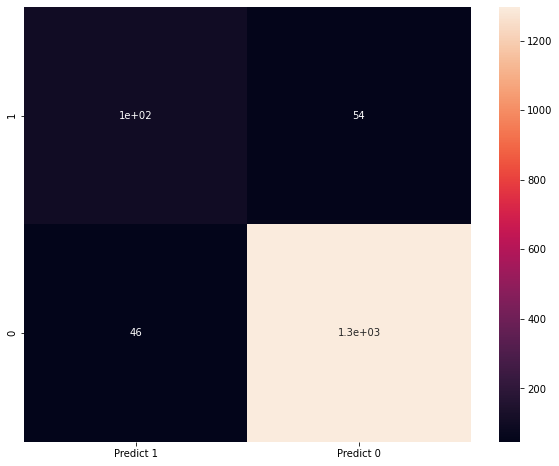

In [517]:
cm_LReg=metrics.confusion_matrix(y_test, y_predict_LReg, labels=[1, 0])

df_LReg = pd.DataFrame(cm_LReg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_LReg, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model ha a good accuracy score of .93, but most of the values predicted are from "Personal Loan" = 0 , which is not very valuable</li>
    <li>It is important that model performs well for the "Personal Loan" = 1 i.e predicting who will available the personal loan</li>
    <li>The precisoin, recall and accuracy for the "Personal Loan" = 0 is excellent</li>
    <li>The precisoin, recall and accuracy for the "Personal Loan" = 1 is not as high, this has to be compared with the other models to compare performance</li>
    
 <Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">In Contention </span>
    

<span style="color:#6495ED; font-size:2em">Gaussian Naive Bayes </span>

<span style="color:#6495ED; font-size:1em">Importing the Libraries for Gaussian Naive Bayes Model and Running the model</span>
 

In [518]:
from sklearn.naive_bayes import GaussianNB
GNBModel = GaussianNB()
GNBModel.fit(x_train, y_train)

GaussianNB()

<span style="color:#6495ED; font-size:1em">Performance Analysis & Scores </span>


In [519]:
y_predict_GNB = GNBModel.predict(x_test)

print("Classification Report")
print(metrics.classification_report(y_test, y_predict_GNB, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.11      0.70      0.19       157
           0       0.91      0.34      0.49      1343

    accuracy                           0.38      1500
   macro avg       0.51      0.52      0.34      1500
weighted avg       0.82      0.38      0.46      1500



<span style="color:#6495ED; font-size:1em">Confusion Matrix</span>

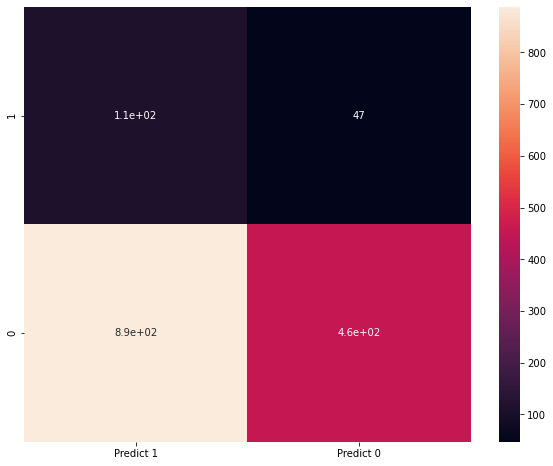

In [521]:
cm_GNB=metrics.confusion_matrix(y_test, y_predict_GNB, labels=[1, 0])

df_GNB = pd.DataFrame(cm_GNB, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_GNB, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model has very poor accuracy score</li>
    <li>It is important that model performs well for the "Personal Loan" = 1 i.e predicting who will available the personal loan</li>
    <li>While the precision for "Personal Loan" = 0 is excellent, the recall and f1-scores are not satisfactory inspite haveing high support</li>
    <li>While the recall for "Personal Loan" = 1 is good, the precision and f1-scores are not satisfactory</li>
    <li>Model is mainly rejected becasue of bad performance in "Personal Loan" = 1 precision</li>

 <Strong>Conclusion: </Strong> <span style="color:red; font-size:1em">REJECTED</span>

<span style="color:#6495ED; font-size:2em">KNN Model </span>

<span style="color:#6495ED; font-size:1em">Importing the Libraries for KNN Model</span>


In [522]:
from sklearn.neighbors import KNeighborsClassifier

<span style="color:#6495ED; font-size:1em">Chosing the Optimal K Value</span>


In [523]:
scores =[]
for k in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))

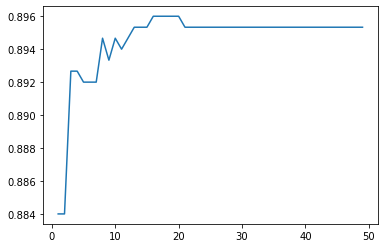

In [524]:
plt.plot(range(1,50),scores)

Note: The curve is flattening after a point due to the high number of Personal Loan = "0" values


<span style="color:#6495ED; font-size:1em">Running the KNN Model with K = 18</span>

In [525]:
KNN = KNeighborsClassifier(n_neighbors= 18 , weights = 'distance' )
KNN.fit(x_train, y_train)
y_predict_KNN = KNN.predict(x_test)

<span style="color:#6495ED; font-size:1em">Performance Analysis & Scores</span>

In [526]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.01      0.03       157
           0       0.90      1.00      0.95      1343

    accuracy                           0.90      1500
   macro avg       0.78      0.51      0.49      1500
weighted avg       0.87      0.90      0.85      1500



<span style="color:#6495ED; font-size:1em">Confusion Matrix</span>

Confusion Matrix


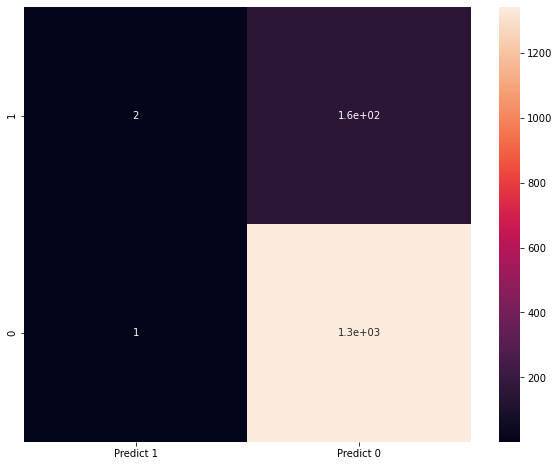

In [528]:
print("Confusion Matrix")
cm_KNN = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1, 0])

df_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_KNN, annot=True)

<strong>Observations:</strong> 
<ul>
    <li> The model ha a good accuracy score, but most of the values predicted are Personal Loan" = 0 </li>
    <li>We ran the KNN algorith for various values of K and identified that 18 is the most optimal value </li>
    <li>The precision, recall and the f1 score are excellent for "Personal Loan" = 0 </li>
    <li>While the precision for "Personal Loan" = 1 is satisfactor, the recall and f1 are too low for this model to be considered</li>
    <li> The model has only predicted 3 values of "Personal Loan" = 1 which is very low ( recall )  </li>
    
 <Strong>Conclusion: </Strong> <span style="color:red; font-size:1em">REJECTED</span>

<span style="color:#6495ED; font-size:2em">Support Vector Machine Model</span>

<span style="color:#6495ED; font-size:1em">Importing the Libraries for the SVM Model </span>


In [529]:
from sklearn import svm

<span style="color:#6495ED; font-size:1em">Identifying the Optimal Value of gamma and C </span>

In [530]:
max_score = 0
C_Final = 0
Gamma_Final = 0
score_temp = 0
for gam in range(1,20):
    gam_temp = .02/gam
    for Csel in range(1,11):
        SVM_Model = svm.SVC(gamma=gam_temp, C=Csel) 
        SVM_Model.fit(x_train , y_train)
        score_temp = SVM_Model.score(x_train, y_train)
        if(score_temp > max_score):
            max_score = score_temp
            C_Final = Csel
            Gamma_Final = gam_temp

In [531]:
SVM_Model = svm.SVC(gamma=Gamma_Final, C=C_Final)
SVM_Model.fit(x_train , y_train)

SVC(C=10, gamma=0.02)

In [532]:
y_predict_SVM = SVM_Model.predict(x_test)

<span style="color:#6495ED; font-size:1em">Performance Analysis & Scores</span>

In [533]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_SVM, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.55      0.25      0.35       157
           0       0.92      0.98      0.95      1343

    accuracy                           0.90      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.88      0.90      0.88      1500



<span style="color:#6495ED; font-size:1em">Confusion Matrix</span>

Confusion Matrix


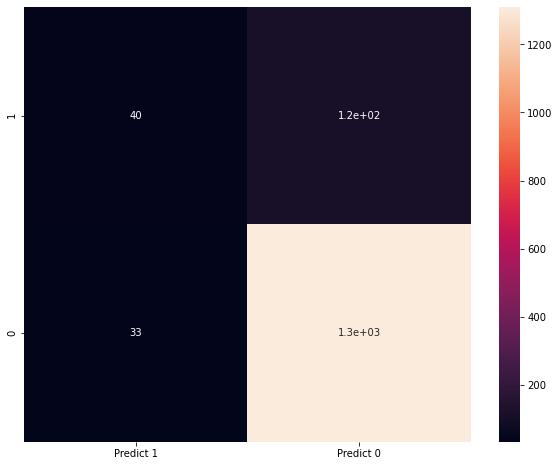

In [535]:
print("Confusion Matrix")
cm_SVM = metrics.confusion_matrix(y_test, y_predict_SVM, labels=[1, 0])

df_SVM = pd.DataFrame(cm_SVM, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_SVM, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model has a good accuracy score of .9</li>
    <li>The precision, recall and the f1 score are excellent for "Personal Loan" = 0 </li>
    <li>While the precision for "Personal Loan" = 1 is satisfactory, the recall and f1 are are less than satisfactory</li>
    
<Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">IN CONTENTION</span>

<span style="color:#6495ED; font-size:1em">SVC with other Kernals  </span>


In [536]:
C_Final = 0
Gamma_Final = 0
score_temp = 0
for gam in range(1,20):
    gam_temp = .02/gam
    for Csel in range(1,11):
        SVM_Model = svm.SVC(gamma=gam_temp, C=Csel,kernel="poly") 
        SVM_Model.fit(x_train , y_train)
        score_temp = SVM_Model.score(x_train, y_train)
        if(score_temp > max_score):
            max_score = score_temp
            C_Final = Csel
            Gamma_Final = gam_temp

In [537]:
SVM_Model = svm.SVC(gamma=Gamma_Final, C=C_Final,kernel="poly")
SVM_Model.fit(x_train , y_train)

SVC(C=9, gamma=0.02, kernel='poly')

In [538]:
y_predict_SVM_poly = SVM_Model.predict(x_test)

<span style="color:#6495ED; font-size:1em">Performance Analysis & Scores</span>

In [539]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_SVM_poly, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.54      0.34      0.42       157
           0       0.93      0.97      0.95      1343

    accuracy                           0.90      1500
   macro avg       0.73      0.65      0.68      1500
weighted avg       0.89      0.90      0.89      1500



<span style="color:#6495ED; font-size:1em">Confusion Matrix</span>

Confusion Matrix


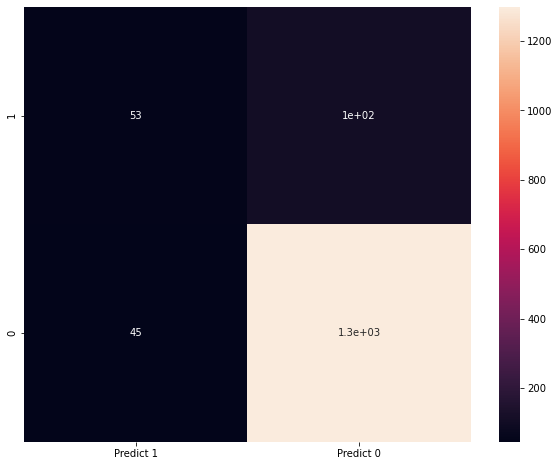

In [541]:
print("Confusion Matrix")
cm_SVM_poly = metrics.confusion_matrix(y_test, y_predict_SVM_poly, labels=[1, 0])

df_SVM_poly = pd.DataFrame(cm_SVM_poly, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_SVM_poly, annot=True)

<strong>Observations:</strong> 
<ul>
    <li>The model has a good accuracy score of .9</li>
    <li>The precision, recall and the f1 score are excellent for "Personal Loan" = 0 </li>
    <li>While the precision for "Personal Loan" = 1 is satisfactory, the recall and f1 are less than satisfactory</li>
    
<Strong>Conclusion: </Strong> <span style="color:green; font-size:1em">IN CONTENTION</span>

<span style="color:#6495ED; font-size:2em">Model Selection</span>
<br>
<span style="color:#6495ED; font-size:1em">Answer to the Question: Give your reasoning on which is the best model in this case and why it performs better?</span>

<Strong>Selected Model: </Strong> <span style="color:green; font-size:1em">Logsitic Regression model</span> 
<br>
Based on the observations for all the models, the <strong>Logsitic Regression model</strong> seems to be the best performing model based on the precision, accuracy, recall and the F1 scores

| Model                | Personal Loan | Precision  | Recall  | F1  |
|----------------------|---------------|------------|---------|-----|
| Logistic Regression  | 1             | .69        | .66     | .67 |
| Logistic Regression  | 0             | .96        | .97     | .96 |
| Gaussian Naive Bayes | 1             | .11        | .70     | .19 |
| Gaussian Naive Bayes | 0             | .91        | .34     | .49 |
| KNN                  | 1             | .67        | .01     | .03 |
| KNN                  | 0             | .9         | 1.0     | .95 |
| SVM - rfb            | 1             | .55        | .25     | .35 |
| SVM - rfb            | 0             | .92        | .98     | .95 |
| SVM - poly           | 1             | .54        | .34     | .42 |
| SVM - poly           | 0             | .93        | .97     | .95 |

|         Model        | Accuracy |
|:--------------------:|----------|
| Logistic Regression  |    .93   |
| Gaussian Naive Bayes |    .37   |
| KNN                  |    .90   |
| SVM - rfb            |    .90   |
| SVM - poly           |    .90   |